Link to where I found the data:

https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv

# About the dataset

Smart-Yoga Pillow (SaYoPillow) is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. In SayoPillow.csv, you will see the relationship between the parameters:

- sr - Snoring range of the user, expressed in decibels (dB). Higher values may indicate more intense snoring.

- rr - Respiration rate, indicates the user's breathing rate, expressed in beats per minute (bpm). It can provide insights into the regularity of breathing during sleep.

- t - Body temperature in Fahrenheit. It may influence the quality of sleep and its different phases.

- lm - Limb movement rate. Higher values may indicate sleep instability.

- bo - Blood oxygen levels, important for monitoring respiratory health during sleep.

- rem - Eye movement during the REM (Rapid Eye Movement) phase of sleep. The REM phase is associated with intense and dream-filled sleep.

- sr.1 - Number of hours of sleep. Crucial for assessing overall sleep quality.

- hr - Heart rate, providing information about heart activity during sleep.

- sl - Stress levels, encoded numerically (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high). It may be relevant for analyzing the impact of stress on sleep. 

Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading the data

In [3]:
pillow_df = pd.read_csv('SaYoPillow.csv') 

pillow_df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Cleaning Data

Checking NaN values

In [4]:
pillow_df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

<b>The output indicates that there are no missing values in any of the columns of this dataset. </b>

In [5]:
pillow_df = pillow_df.rename(columns={
    'sr':'snoring_range',
    'rr':'respiration_rate', 
    't':'body_temperature',
    'lm':'limb_movement_rate',
    'bo':'blood_oxygen',
    'rem':'eye_movement',
    'sr.1':'sleeping_hours',
    'hr':'heart_rate',
    'sl':'stress_level'})

pillow_df.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Checking duplicates

In [6]:
duplicates = pillow_df.duplicated()

duplicates_df = pillow_df[duplicates]
print(duplicates_df)

Empty DataFrame
Columns: [snoring_range, respiration_rate, body_temperature, limb_movement_rate, blood_oxygen, eye_movement, sleeping_hours, heart_rate, stress_level]
Index: []


<b>There are no duplicates in this DataFrame.</b>

Splitting into Categorical and Numerical

In [7]:
categorical = pillow_df.select_dtypes(include=object)
numerical = pillow_df.select_dtypes(include=np.number)

# Stress_level could be considered as categorical data, but I will leave it as an int for easier interpretation.

# Wrangling Data

Checking unique values of columns

In [8]:
pillow_df.nunique()

snoring_range         627
respiration_rate      626
body_temperature      626
limb_movement_rate    626
blood_oxygen          626
eye_movement          626
sleeping_hours        501
heart_rate            626
stress_level            5
dtype: int64

In [1]:
#for col in pillow_df.columns:
#    vals = pillow_df[col].unique()
#    print(f"Unique values in '{col}':\n{vals}\n")

Checking datatypes

In [10]:
pillow_df.dtypes

snoring_range         float64
respiration_rate      float64
body_temperature      float64
limb_movement_rate    float64
blood_oxygen          float64
eye_movement          float64
sleeping_hours        float64
heart_rate            float64
stress_level            int64
dtype: object

Converting temperature values in Fahrenheit to Celsius

In [11]:
def fahrenheit_to_celsius(f):
    return (f - 32) * 5/9

pillow_df['body_temperature'] = pillow_df['body_temperature'].apply(fahrenheit_to_celsius)


Rounding values in the DataFrame

In [ ]:
pillow_df = pillow_df.applymap(lambda x: round(x, 2))

In [12]:
# Combining values to ease encoding on categorical data

# -> there's no categorical data

# EDA

In [13]:
# Checking head, shape and info

pillow_df.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.68,33.24,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,33.08,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,35.56,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,32.65,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,36.60,6.50,96.25,72.48,8.25,53.12,0


In [14]:
pillow_df.shape

(630, 9)

In [15]:
pillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   snoring_range       630 non-null    float64
 1   respiration_rate    630 non-null    float64
 2   body_temperature    630 non-null    float64
 3   limb_movement_rate  630 non-null    float64
 4   blood_oxygen        630 non-null    float64
 5   eye_movement        630 non-null    float64
 6   sleeping_hours      630 non-null    float64
 7   heart_rate          630 non-null    float64
 8   stress_level        630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [16]:
round(pillow_df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
snoring_range,630.0,71.60,19.37,45.00,52.50,70.00,91.25,100.00
respiration_rate,630.0,21.80,3.97,16.00,18.50,21.00,25.00,30.00
body_temperature,630.0,33.78,1.96,29.44,32.50,33.89,35.28,37.22
limb_movement_rate,630.0,11.70,4.30,4.00,8.50,11.00,15.75,19.00
blood_oxygen,630.0,90.90,3.90,82.00,88.50,91.00,94.25,97.00
eye_movement,630.0,88.50,11.89,60.00,81.25,90.00,98.75,105.00
sleeping_hours,630.0,3.70,3.05,0.00,0.50,3.50,6.50,9.00
heart_rate,630.0,64.50,9.92,50.00,56.25,62.50,72.50,85.00
stress_level,630.0,2.00,1.42,0.00,1.00,2.00,3.00,4.00


 Approximate normal values for healthy individuals during sleep:

    Respiration Rate: 12–20 breaths per minute.
    Body Temperature: Around 36-37 degrees Celsius (97-98.6 degrees Fahrenheit).
    Limb Movement Rate: It can vary, but in most cases, it is low, as most people sleep without significant limb movement.
    Blood Oxygen Level: Should be maintained above 95%.
    Eye Movement: Intensive eye movements occur during the REM phase (rapid eye movement sleep).
    Sleeping Hours: For adults, it is generally recommended to sleep for 7 to 9 hours.
    Heart Rate: 60–100 beats per minute.
    
    These values are approximate and may slightly vary depending on the source and individual differences. 
    
If the thermometer shows a really low temperature, there is a possibility that there is a measurement error. Low temperature is often the result of the thermometer not being pressed firmly enough against the body surface or the measurement being too short.



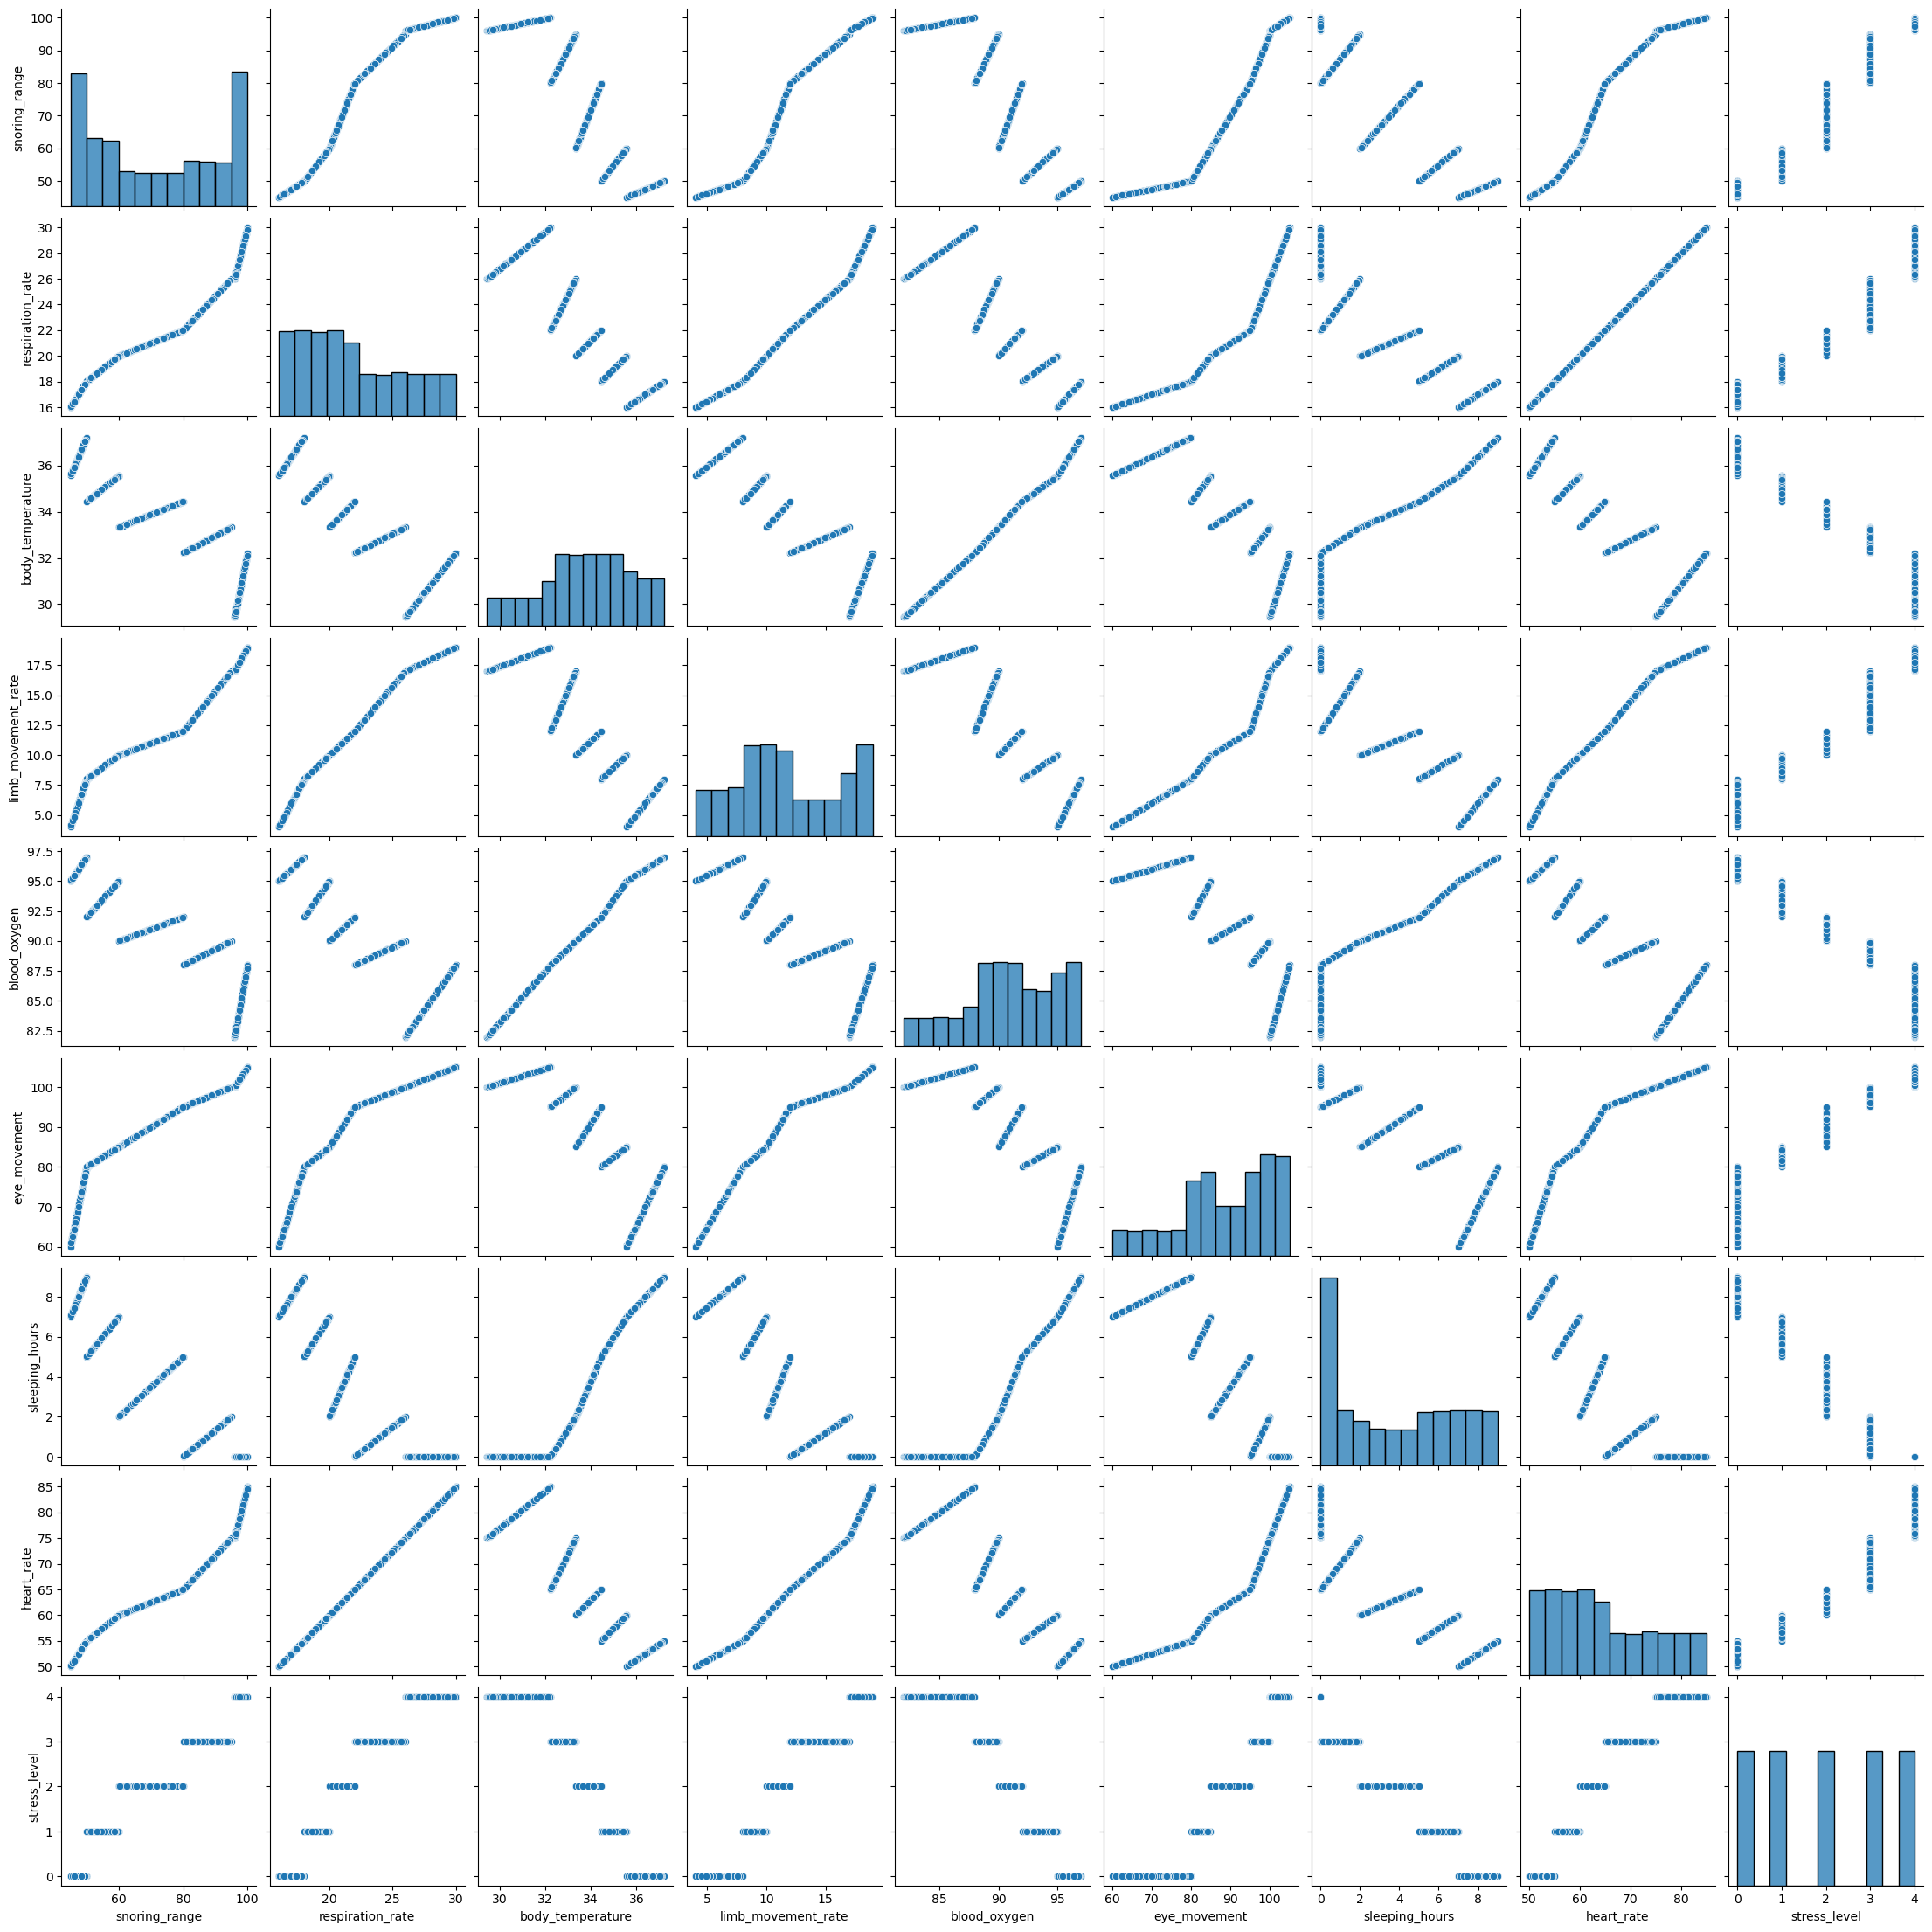

In [17]:
# Plotting all columns

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    sns.pairplot(pillow_df, size=2.5)
    plt.show()

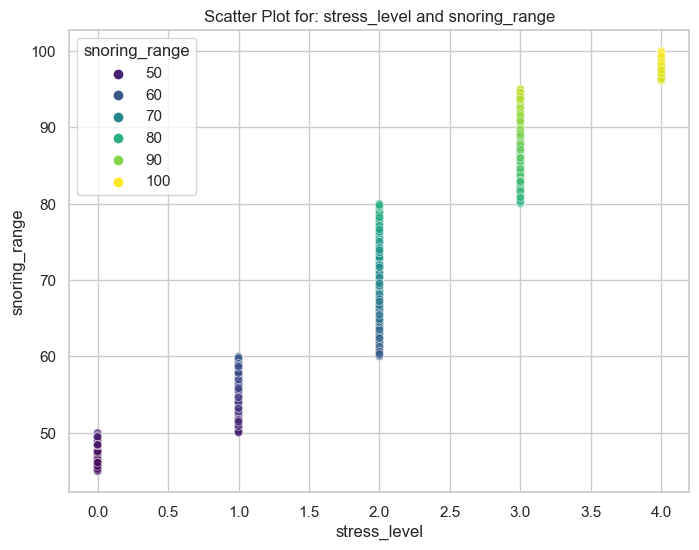

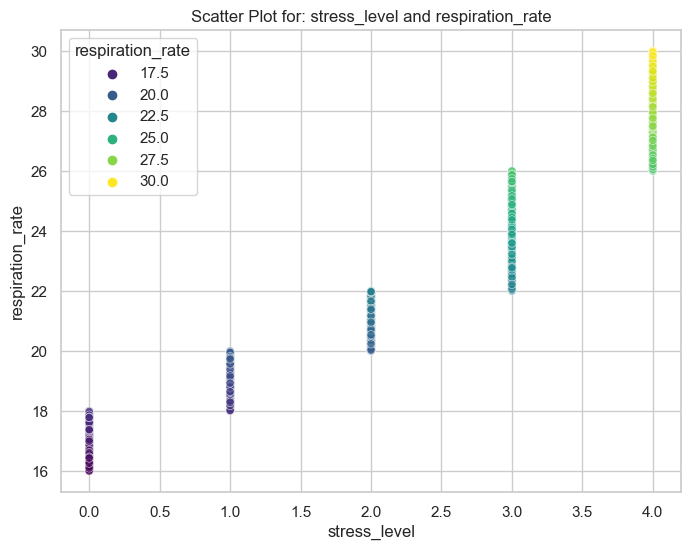

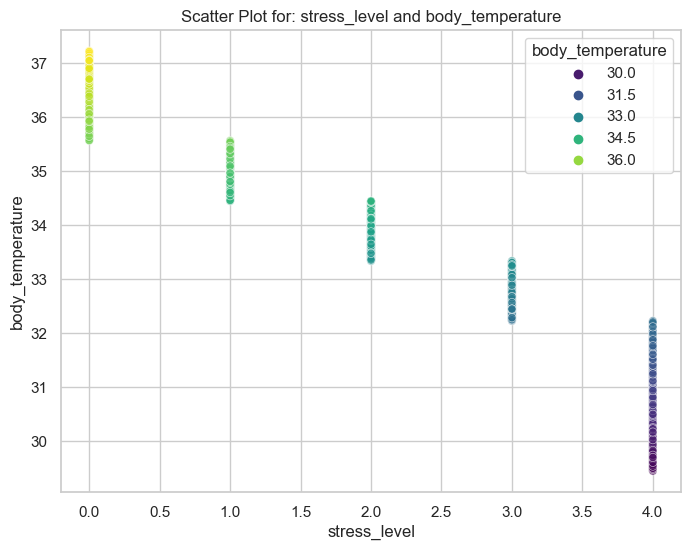

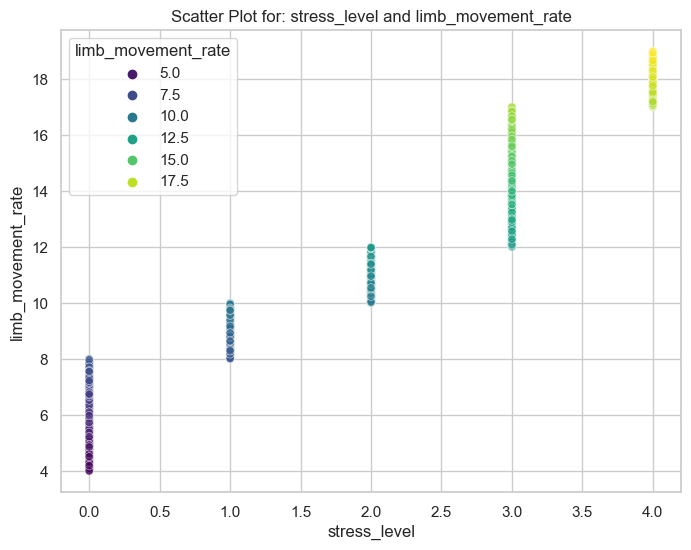

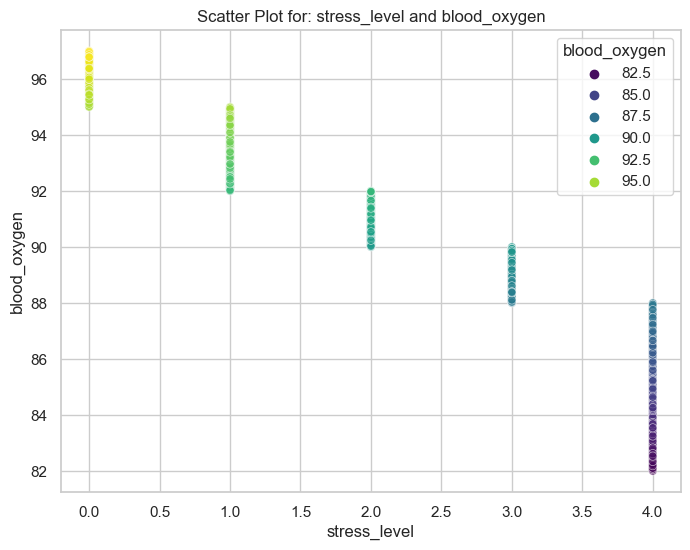

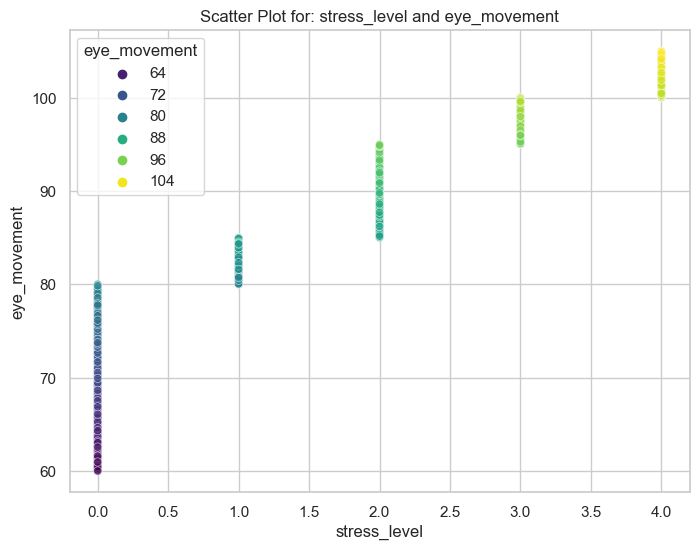

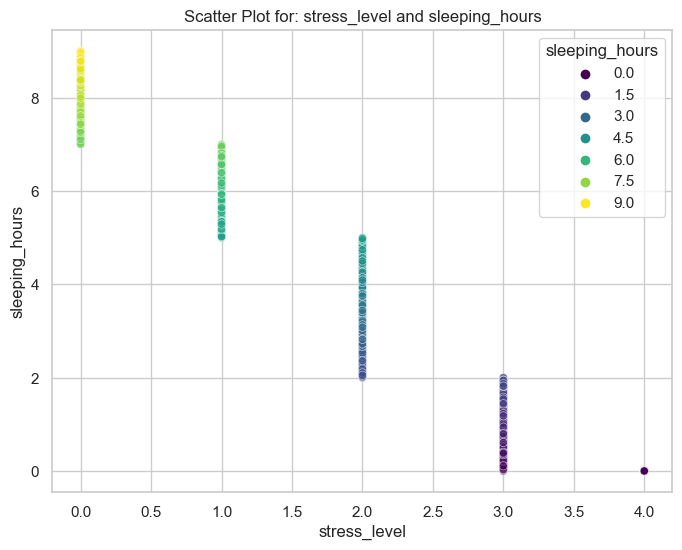

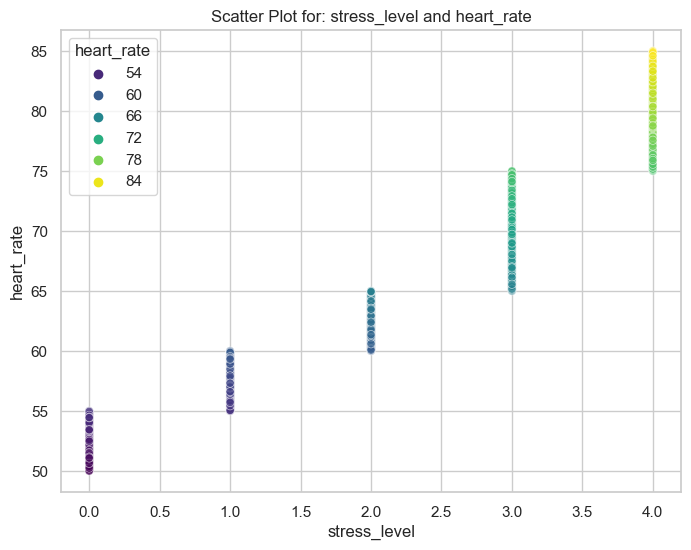

In [18]:
sns.set(style="whitegrid")

continuous_variables = ['snoring_range', 'respiration_rate', 'body_temperature', 'limb_movement_rate', 'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate']

for variable in continuous_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pillow_df['stress_level'], y=pillow_df[variable], hue=pillow_df[variable], palette='viridis', alpha=0.7)
    plt.title(f'Scatter Plot for: stress_level and {variable}')
    plt.xlabel('stress_level')
    plt.ylabel(variable)
    plt.legend(title=variable)
    plt.show()

Here we can clearly see the negative correlation between Stress Level and Number of Hours Slept.



How many hours should people sleep on an average to maintain low stress levels and vice versa?

    People who sleep 8 hours on average in a single day report no or very low stress levels.

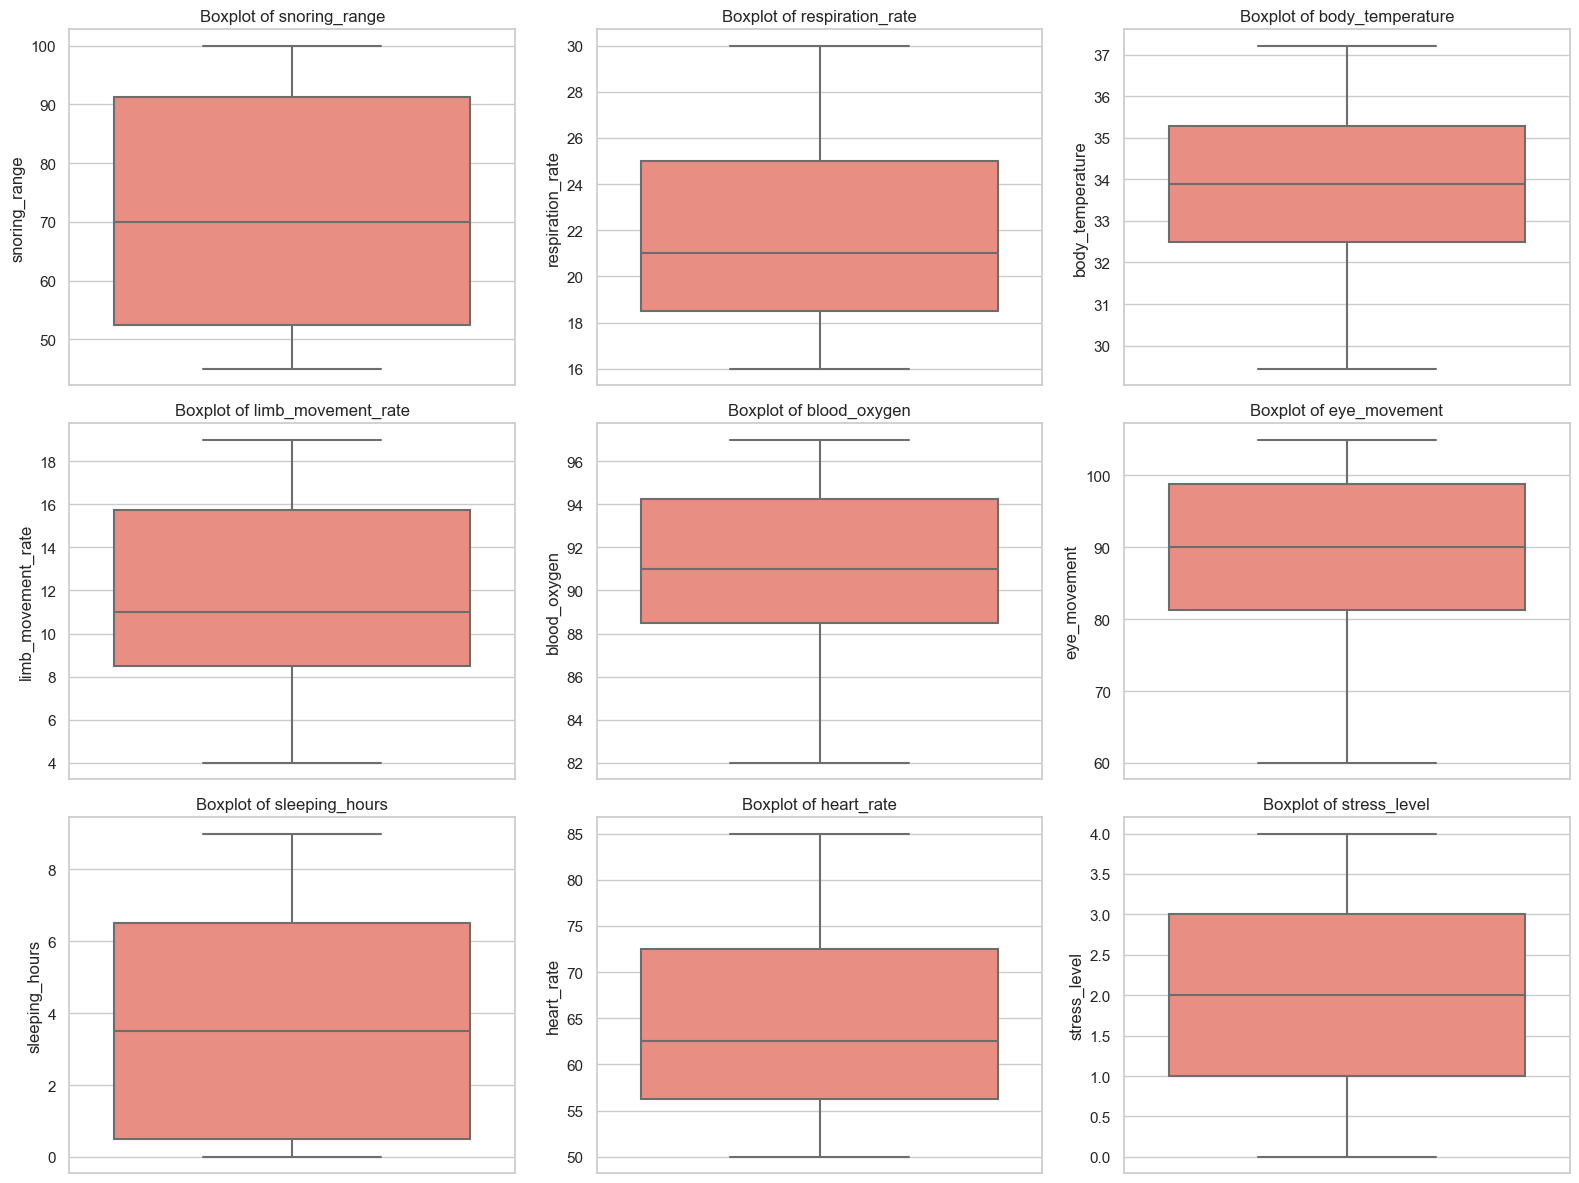

In [19]:
# Checking for outliers

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=pillow_df[col], color='salmon')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

<b>There are no outliers.</b>

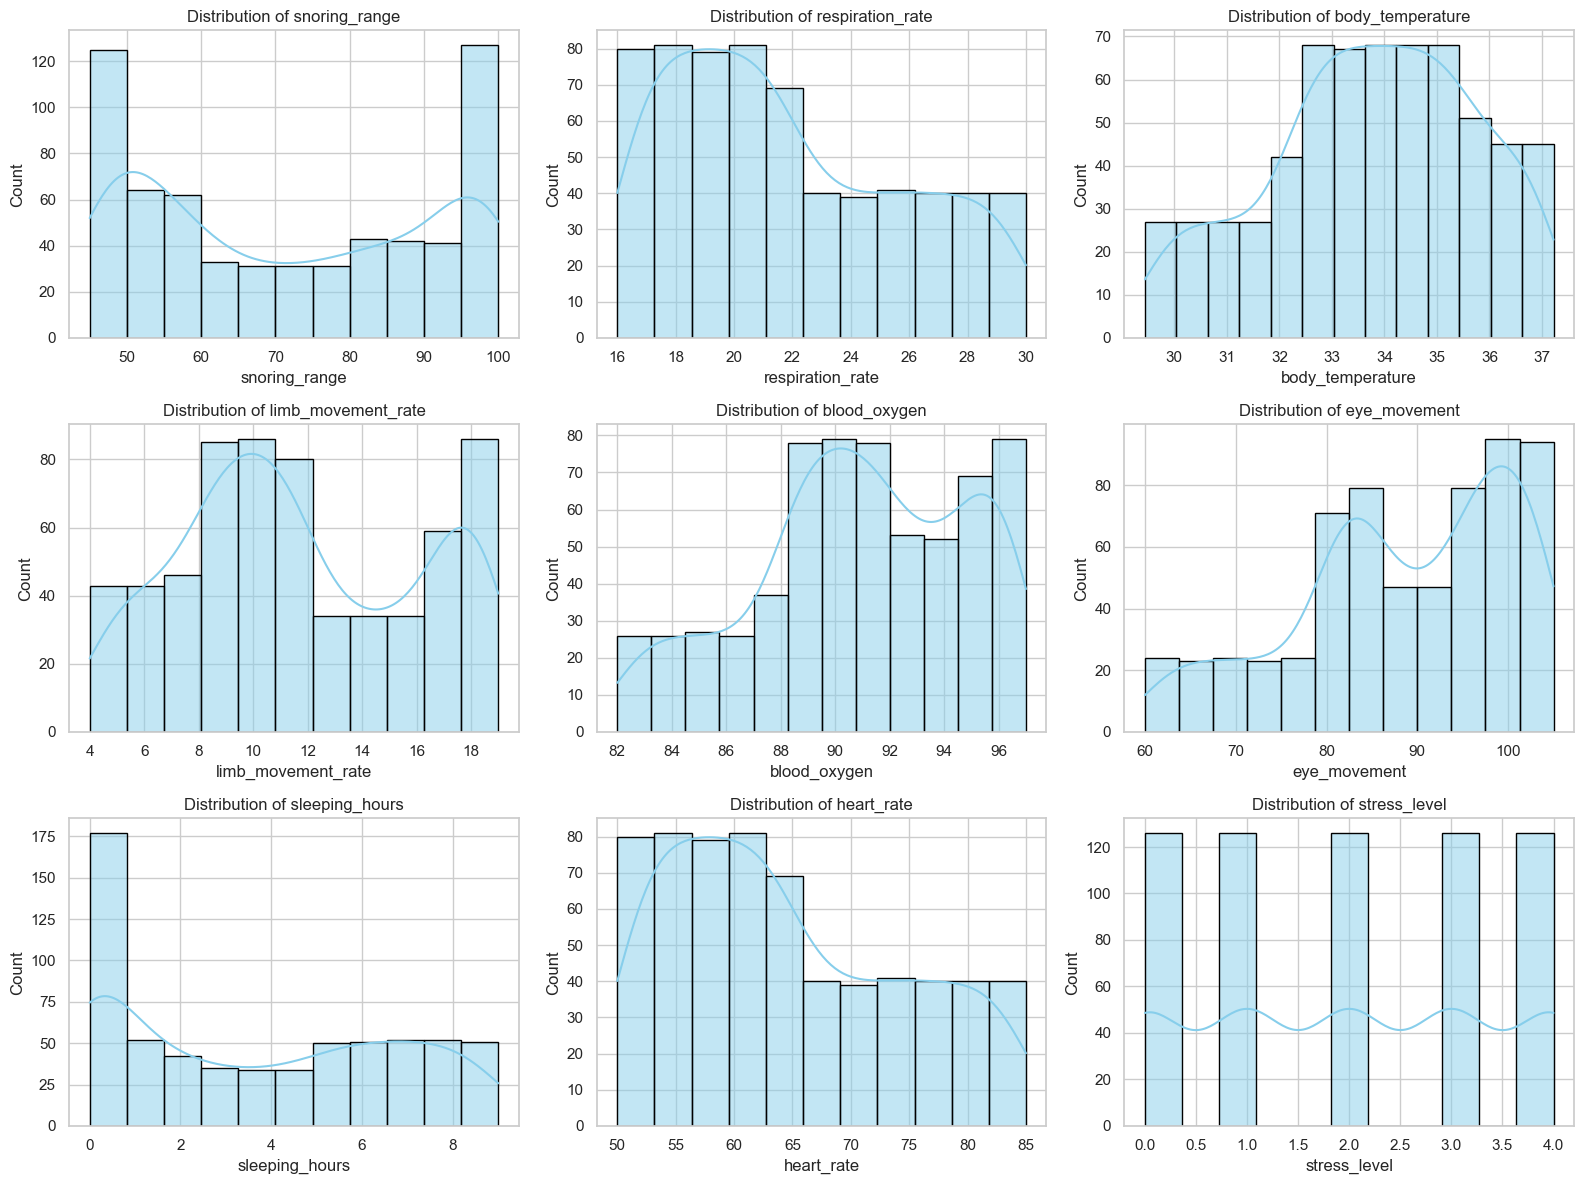

In [20]:
# checking distributions of numerical columns 

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(pillow_df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

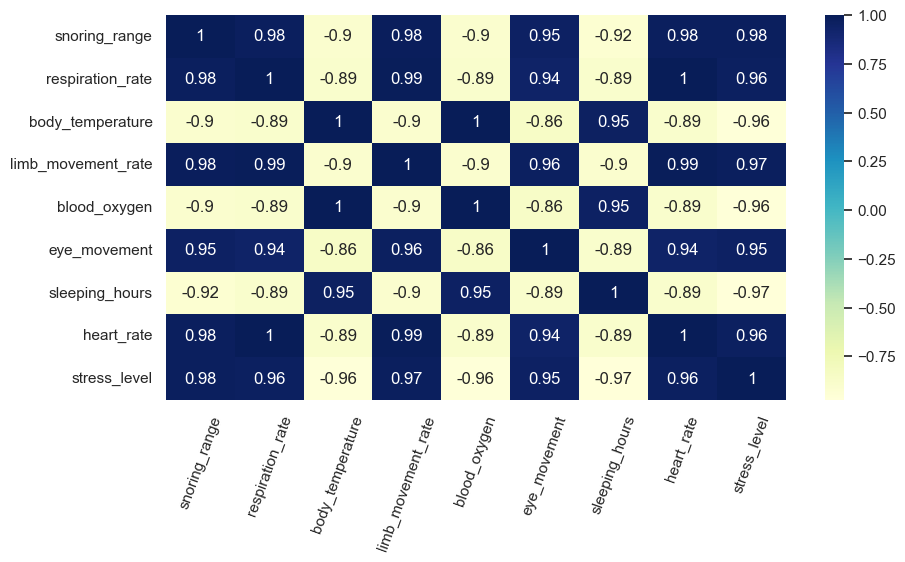

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = sns.heatmap(numerical.corr(), annot=True, cmap='YlGnBu')

for item in heatmap.get_xticklabels():
    item.set_rotation(70)

plt.show()

In [22]:
numerical_columns = pillow_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = pillow_df[numerical_columns].corr()

print(correlation_matrix)

                    snoring_range  respiration_rate  body_temperature  \
snoring_range            1.000000          0.976267         -0.902469   
respiration_rate         0.976267          1.000000         -0.889232   
body_temperature        -0.902469         -0.889232          1.000000   
limb_movement_rate       0.981077          0.991736         -0.896421   
blood_oxygen            -0.903142         -0.889213          0.998105   
eye_movement             0.950600          0.935570         -0.857340   
sleeping_hours          -0.920556         -0.891858          0.954875   
heart_rate               0.976268          1.000000         -0.889232   
stress_level             0.975322          0.963515         -0.962364   

                    limb_movement_rate  blood_oxygen  eye_movement  \
snoring_range                 0.981077     -0.903142      0.950600   
respiration_rate              0.991736     -0.889213      0.935570   
body_temperature             -0.896421      0.998105     -0

The heatmap shows a very strong relationships: Correlation values above 0.8 (positive) or below -0.8 (negative) indicate a very strong relationship between the variables. Changes in one variable are closely related to changes in the other variable.

What's the relationship between sleep and stress?

    Sleeping Hours appear to be strongly related to Stress Levels, suggesting that less sleep may be associated with higher stress levels and vice versa - Sleeping Hours and Stress Level have a strong negative correlation (-0.973037). A value close to -1 indicates a strong negative relationship, meaning that the higher the stress level, the shorter the sleep duration.
    Stress Level has also strong positive corelation with: snoring_range (0.975322), respiration_rate (0.963515) and heart_rate (0.963516). This means that the higher the stress level, the higher the snoring range (snoring_range), the higher the breathing rate (respiration_rate) and the higher the heart rate (heart_rate).

#  Processing Data

In [21]:
# Split X, y

X = pillow_df.drop('stress_level', axis=1)
y = pillow_df['stress_level']

In [22]:
# Train, Test, Split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scaling Numericals (X_train, X_test)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [24]:
# Encode Categoricals (Ordinal or 1-hot).(X_train, X_test)

# -> no categoricals

In [25]:
# Resetting indexes

# in training set
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# in test set
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Modeling - Validation

In [26]:
# Fitting models with training data only

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)


mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on Training Data: {mse_train}")

Mean Squared Error on Training Data: 0.00020812734198600942


A very low MSE on the training data (0.0002) indicates that the regression model has closely fit the training data.
This means that the model's predictions are very close to the actual values in the training set. 

In [27]:
# transforming both train and test 

X_test_scaled = scaler.transform(X_test)

In [28]:
# Use metrics to determine best model

# Predictions on the test set using trained linear regression model
y_test_pred = model.predict(X_test_scaled)

# MSE on test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on Test Data: {mse_test}")

# R-squared on test set
r2_test = model.score(X_test_scaled, y_test)
print(f"R2 on Test Data: {r2_test}")

Mean Squared Error on Test Data: 0.0002648617799889965
R-squared on Test Data: 0.9998619337529845


A low Mean Squared Error (MSE) on the test data (0.00026) indicates that the regression model performs well and has low prediction errors on new, unseen data. A high R2 value on the test data (0.9999) suggests that the model explains a very high proportion of the variance in the test set, indicating good predictive performance. These results suggest that the regression model fits the training data well and generalizes effectively to new data.

In [29]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


 Accuracy: 1.0 (100%): The model achieved perfect accuracy, correctly classifying all samples in the test set.

Classification Report: Precision, Recall, F1-score: All metrics are 1.0 for each class, indicating no false positives or false negatives.

Confusion Matrix: All values on the main diagonal are non-zero, indicating correct classifications for each class.

Summary: The model performs really well on the test set, with perfect accuracy. 

In [30]:
# KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (k-NN): {accuracy_knn}")

print("Classification Report (k-NN):")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix (k-NN):")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy (k-NN): 1.0
Classification Report (k-NN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Confusion Matrix (k-NN):
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


Accuracy (k-NN): 1.0 (100%): The k-NN model achieved perfect accuracy, correctly classifying all samples in the test set.

Classification Report (k-NN): Precision, Recall, F1-score: All metrics are 1.0 for each class, indicating no false positives or false negatives.

Confusion Matrix (k-NN): All values on the main diagonal are non-zero, indicating correct classifications for each class.

Summary: Similar to the logistic regression model, the k-NN model performs really well on the test set, having perfect accuracy.

# Saving Data

In [ ]:
# Saving DataFrame to .csv

pillow_df.to_csv('clean_pillow_df.csv', index=False)

In [ ]:
clean_pillow_df = pd.read_csv('clean_pillow_df.csv') 

In [32]:
# Saving to SQL

import pymysql
from sqlalchemy import create_engine
import getpass 
password = getpass.getpass("Please enter the SQL database password: ")
connection_string = 'mysql+pymysql://root:' + password + '@localhost/Ironhack_Mid_Project'
engine = create_engine(connection_string)

# with engine.begin() as connection:
# df.to_sql(name='INSERT_TABLE_NAME_HERE/INSERT_NEW_TABLE_NAME', con=connection, if_exists='append', index=False)

  clean_pillow_df.to_sql(name='clean_pillow', con=connection, if_exists='append', index=False)

Please enter the SQL database password: ········


In [33]:
# Reading back from SQL

password = getpass.getpass()
query1 = 'SELECT * FROM clean_pillow'
pillow_df_analysis = pd.read_sql_query(query1, engine)
pillow_df_analysis

········


,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.68,33.24,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,33.08,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,35.56,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,32.65,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,36.60,6.50,96.25,72.48,8.25,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.60,20.96,33.87,10.96,90.96,89.80,3.44,62.40,2
626,48.44,17.38,36.70,6.75,96.38,73.76,8.38,53.44,0
627,97.50,27.50,30.49,17.75,84.26,101.88,0.00,78.76,4
628,58.64,19.73,35.40,9.73,94.59,84.32,6.73,59.32,1


# Hypotesis Testing

In [34]:
# Formulating a hypothesis about the data and performing the test.


# Hypothesis:

# H0: The mean sleeping hours are the same across all stress levels.
# H1: There is a significant difference in mean sleeping hours across stress levels.

In [35]:
import scipy.stats as stats

grouped_data = [pillow_df_analysis['sleeping_hours'][pillow_df_analysis['stress_level'] == level] for level in pillow_df_analysis['stress_level'].unique()]

# function f_oneway for ANOVA test
stat, p_val = stats.f_oneway(*grouped_data)

# results:
print(f"F-statistic: {stat}")
print(f"P-value: {p_val}\n")

# if the p-value is below a chosen significance level (0.05), the null hypothesis rejected 
#  and there is a significant difference in the means 
# if the p-value is above 0.05, the null hypothesis cannot be rejected, suggesting no significant difference

# interpretation of results:
if p_val < 0.05:
    print("H0 rejected - there is a significant difference in mean sleeping hours across stress levels.")
else:
    print("H0 not rejected - there is NO significant difference in mean sleeping hours across stress levels.")

F-statistic: 3937.1484688866817
P-value: 0.0

H0 rejected - there is a significant difference in mean sleeping hours across stress levels.


Large F-statistic value (3937.15) suggests a significant difference between at least two groups.

P-value of 0.0 means a very low chance of obtaining such results if H0 were true.